In [26]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Enrichment

Enrichment is the stage at which natural uranium is processed to acheive higher concentrations of fissile $^{235}U$ isotopes.

## Learning Objectives

- Recall the isotopic content of natural uranium.
- Identify target enrichments for various applications.
- Distinguish among enrichment technologies.
- Calculate the isotopic content of feed, product, and tails during enrichment.
- Explain the physical and chemical mechanisms of various enrichment technologies.
- Discuss the nonproliferation implications of enrichment technology export control.

## Natural Uranium

Describe the isotopic content of natural uranium in weight and isotope fractions.

## Enrichment Level

_Commercial LWR Fuel_: Commercial nuclear fuel for light water reactors is typically in the range of 3-5%

_Research Reactor Fuel_: Research reactor fuel (such as TRIGA reactors in many universities) was previously often as high as 40%. However, a downblending effort was undertaken nationally and the fuel is now much less enriched.

_Small Modular Reactor Fuel_: Small modular reactors often bost long running times, such that the fuel rarely needs to be replaced. Though these typically rely on breeding for long term sustainability, the initial enrichment is usually relatively high in these designs.

_Navy Fuel_: Classified, but high. 

_Weapons_: Very high. This varies by weapon type. Does anyone recall the $^{325}U$ enrichment of the Godiva device? (_Hint_: It was 30cm in diameter.)


In [77]:
enr_sources = {'natural U':0.007,
               'recycled U': 0.01}

enr_uses = {'CANDU':0.007,
            'LWR': 0.045,
            'Research':0.20,
            'Weapons': 0.9}

import collections
od_enr_uses = collections.OrderedDict(sorted(enr_uses.items()))

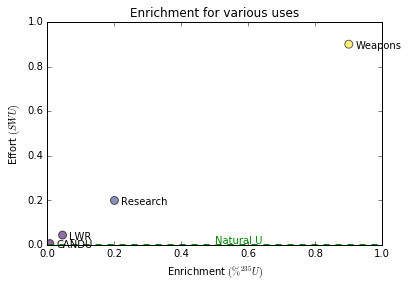

In [105]:
import numpy as np
import matplotlib.pyplot as plt

x=[]
y=[]
delta_x=0.02
delta_y=-0.02

for k,v in od_enr_uses.items():
    x.append(v)
    y.append(v)
    plt.text(v + delta_x, v + delta_y, k)
t = x
area = 20*np.pi
plt.scatter(x, y, s=area, c=t, cmap='viridis', alpha=0.6)
plt.axis([0,1,0,1])
plt.xlabel('Enrichment $(\% ^{235}U)$')
plt.ylabel('Effort $(SWU)$')
plt.title('Enrichment for various uses')
plt.plot(0.007*np.ones(2), 'g--')    
plt.text(0.5, 0.007, 'Natural U', color='g',)

plt.show()

## Gaseous Diffusion

$^{238}UF_6$ and $^{235}UF_6$ have different effusive rates. This is used to separate them through a porous barrier. 

$$\frac{V_L}{V_H} = \sqrt{\frac{M_H}{M_L}} = \alpha$$

In the case of $^{238}UF_6$ and $^{235}UF_6$:

$$M_H = M_{^{238}U} + 6\times M_F$$
$$\Rightarrow M_H = 238 + 6\times 19$$

$$M_L = M_{^{235}U} + 6\times M_F$$
$$\Rightarrow M_H = 235 + 6\times 19$$

In [2]:
import math

class Enrichment(object):
    def __init__(self,           
                 f=0, 
                 p=0, 
                 w=0, 
                 x_f=0, 
                 x_p=0, 
                 x_w=0):
        self.f = f
        self.p = p
        self.w = w
    
    def f(self, p, w):
        return p - w
    
    def p(self):
        return self.feed - self.tails()
    
    def w(self):
        return self.feed - self.prod()
    
    def feed_factor(self, f, p):
        return f/p
     
    def waste_factor(self, f, p):
        """The waste factor is related to the feed factor"""
        self.feed_factor(f, p) - 1
        
    def v(x):
        """separation potential"""
        return 2*x - 1 * log(x/(1-x))
        
    def swu(self, x_p, x_w, x_f):
        return P*self.v(x_p) + T*self.v(x_t) - f*self.v(x_f)
    
    def swu_factor(self, x_p, x_w, x_f):
        sf = self.v(x_p) + self.waste_factor(f, p)*v(x_w) - self.feed_factor(f, p)*self.v(x_f)
        
class GaseousDiffusion(Enrichment):
    def alpha(self, m_h, m_l):
        """effusive rate?"""
        return math.sqrt(m_h/m_l)


In [3]:
gd = GaseousDiffusion()
m_h = 238 + 6*19
m_l = 235 + 6*19 

enr = [x*0.01 for x in range(0, 6, 1)]

self.feed_factor

plt.plot(enr, gd.swu_factor(enr))

TypeError: swu_factor() missing 1 required positional argument: 'x'

## Centrifugal Enrichment


### Centrifugal Force

Centrifugal enrichment relies on the __centrifugal force__. The centrifugal force is only apparent in the rotating reference frame. In the inertial reference frame, it is not apparent, so it is really a 'fictitious' force. 

#### Velocity
Velocity in a rotating frame of reference, with the absolute angular velocity, $\omega$, gives

$$\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t} = \left[\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}\right] + \boldsymbol{\omega} \times \boldsymbol{r}$$

Note that the square brackets in this notation indicate that the argumet is evaluated in So, the velocity in the rotating reference frame is dependent on the rotation, $\omega$. 

#### Acceleration

Acceleration in a rotating reference frame simply undergoes the same derivative transformation a second time.

$$\begin{align}
\boldsymbol{a} &=\frac{\operatorname{d}^2\boldsymbol{r}}{\operatorname{d}t^2} = \frac{\operatorname{d}}{\operatorname{d}t}\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t} = \frac{\operatorname{d}}{\operatorname{d}t} \left( \left[\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}\right] + \boldsymbol{\omega} \times \boldsymbol{r}\ \right) \\
 &= \left[ \frac{\operatorname{d}^2 \boldsymbol{r}}{\operatorname{d}t^2} \right] + \frac{\operatorname{d} \boldsymbol{\omega}}{\operatorname{d}t}\times\boldsymbol{r} + 2 \boldsymbol{\omega}\times \left[ \frac{\operatorname{d} \boldsymbol{r}}{\operatorname{d}t} \right] + \boldsymbol{\omega}\times ( \boldsymbol{\omega} \times \boldsymbol{r}) \ .
\end{align}
$$

#### Questions:

- What direction is represented by the vector $\boldsymbol{r}$?
- What direction is represented by the vector $\boldsymbol{\omega}$?
- Combining these facts with the equation above, what can be said about the direction of the velocity vector $\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}$?
- What about the direction of the acceleration vector $\frac{\operatorname{d}^2 \boldsymbol{r}}{\operatorname{d}t^2}$?



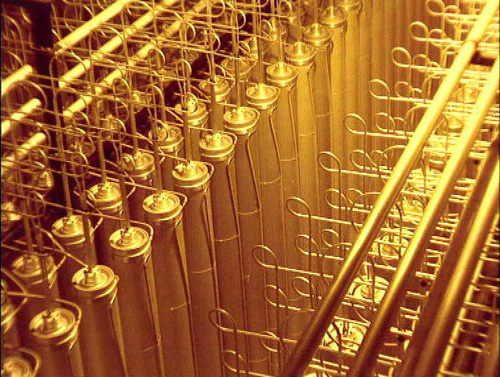

In [25]:
# Let's see a classic image of a bank of centrifuges
from IPython.display import Image
Image("http://world-nuclear.org/uploadedImages/org/info/Nuclear_Fuel_Cycle/Enrichment_and_Conversion/centrfge.jpg")

In [2]:
# An aside about constants.
# Use the built-in constants from the scipy library.
# The gas constant, for example, can be retrieved thus:
from scipy import constants as sc
sc.R

8.3144598

In [1]:
from scipy import constants as sc

class Centrifugal(Enrichment):
    def alpha(self, m_h, m_l, omega, a, t):
        """
        :param omega: angular speed of rotating bowls (rad/s)
        :param a: inside radius of rotor
        :param m_h: molecular weight of \[^{238}U^{19}F_6\]
        :param m_l: molecular weight of \[^{235}U^{19}F_6\]
        :param r: R, molar gas constant
        :param t: temperature in Kelvin
        """
        return math.exp(((m_h-m_l)*(omega**2)*(a**2))/(2*sc.R*t))

ce = Centrifugal()
ce.alpha(m_h, m_l, 10, 1, 300)    
    

NameError: name 'Enrichment' is not defined

## Nozzle Method

The nozzle method is another type of enrichment technology.

## Laser Enrichment



*note* laser enrichment can be used on other isotopes. Can you think of any uses for this?

## Economics of Enrichment

The enrichment technologies used by industry must be energy effecient and economically feasible. 



## World Enrichment Capacity